In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

def add_naive_forecast(df, target_col, months_back, start_date, horizon_months, text):
  
    forecast_col = f"Naive: {months_back}-Month for {text}"
    df[forecast_col] = np.nan

    start = pd.to_datetime(start_date)
    end = start + pd.DateOffset(months=horizon_months - 1)
    reference_date = start - pd.DateOffset(months=months_back)

    if reference_date in df.index:
        naive_value = df[target_col][df.index < start_date].iloc[-1]
        forecast_range = (df.index >= start) & (df.index <= end)
        df.loc[forecast_range, forecast_col] = naive_value

    return df


def getErrors(df_d, df_r, date1, date2, forecast_type):
    month_name = pd.to_datetime(date1).strftime('%B')
    months = pd.date_range(start='2024-01-01', periods=12, freq='MS').strftime('%B')
    mask = (df_d.index >= date1) & (df_d.index <= date2)
    y_true = df_d.loc[mask, "Actual Rate"]
    y_pred = df_d.loc[mask, forecast_type]
    error = y_true - y_pred
    
    #display(y_pred)
    print(error)
    forecast_type_split = forecast_type.split(" f")
    for i, month in enumerate(months):
        if not y_true.isna().all() and not y_pred.isna().all():
            df_r.loc[f"{month_name}", f"{forecast_type_split[0]}: error"] = y_true[month_name]-y_pred[month_name]

    
    return df_r

def getMetrics(df_d, df_r, date1, date2, forecast_type):
    month_name = pd.to_datetime(date1).strftime('%B')
    mask = (df_d.index >= date1) & (df_d.index <= date2)
    y_true = df_d.loc[mask, "Actual Rate"]
    y_pred = df_d.loc[mask, forecast_type]
    forecast_type_split = forecast_type.split(" f")
    if not y_true.isna().all() and not y_pred.isna().all():
        df_r.loc[month_name, f"{forecast_type_split[0]}: MAE"] = mean_absolute_error(y_true, y_pred)
        df_r.loc[month_name, f"{forecast_type_split[0]}: RMSE"] = np.sqrt(mean_squared_error(y_true, y_pred))
    
    return df_r


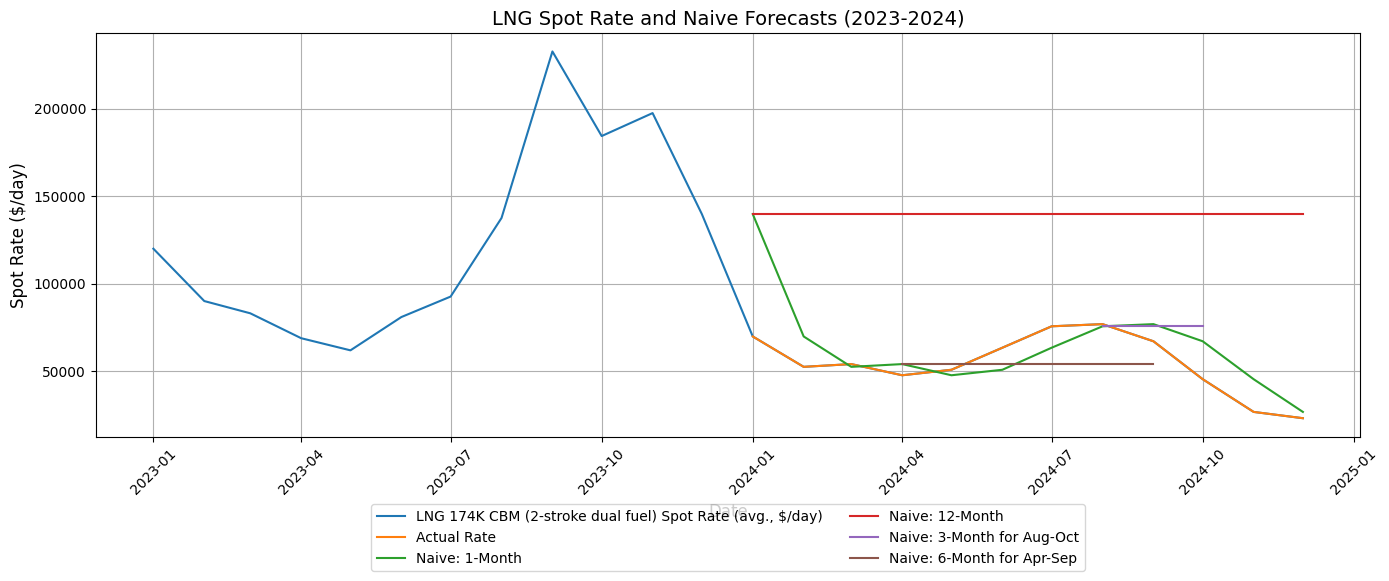

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

file_path = "cleandata.csv"
df_clean = pd.read_csv(file_path)

df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%b-%Y')
df_clean = df_clean.sort_values(by='Date').set_index('Date')
target = 'LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)'

df_forecast = df_clean[[target]].copy()
df_forecast.loc[df_forecast.index >= '2024-01-01', "Actual Rate"] = (df_forecast[target].loc[df_forecast.index >= '2024-01-01'])
df_forecast.loc[df_forecast.index >= '2024-01-01', "Naive: 1-Month"] = (df_forecast[target].shift(1).loc[df_forecast.index >= '2024-01-01'])
df_forecast.loc[(df_forecast.index >= '2024-01-01') & (df_forecast.index <= '2024-12-31'),"Naive: 12-Month"] = (df_forecast[target][df_forecast.index <= "2023-12-01"].iloc[-1])
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-08-01', horizon_months=3, text="Aug-Oct")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-04-01', horizon_months=6, text="Apr-Sep")
#display(df_forecast.loc[df_forecast.index >= '2023-06-01'])
plot_df = df_forecast.loc['2023-01-01':]

# Plotting
plt.figure(figsize=(14, 6))
for column in plot_df.columns:
    plt.plot(plot_df.index, plot_df[column], label=column)

plt.title("LNG Spot Rate and Naive Forecasts (2023-2024)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Spot Rate ($/day)", fontsize=12)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Create 3-month naive forecast starting Jan 2024, filling Jan-Mar 2024
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-01-01', horizon_months=3, text="Jan-Mar")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-02-01', horizon_months=3, text="Feb-Apr")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-03-01', horizon_months=3, text="Mar-May")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-04-01', horizon_months=3, text="Apr-Jun")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-05-01', horizon_months=3, text="May-Jul")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-06-01', horizon_months=3, text="Jun-Aug")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-07-01', horizon_months=3, text="Jul-Sep")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-08-01', horizon_months=3, text="Aug-Oct")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-09-01', horizon_months=3, text="Sep-Nov")
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date='2024-10-01', horizon_months=3, text="Oct-Dec")
# Create 6-month naive forecast starting Jan 2024, filling Jan-Jun 2024
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-01-01', horizon_months=6, text="Jan-Jun")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-02-01', horizon_months=6, text="Feb-Jul")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-03-01', horizon_months=6, text="Mar-Aug")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-04-01', horizon_months=6, text="Apr-Sep")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-05-01', horizon_months=6, text="May-Oct")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-06-01', horizon_months=6, text="Jun-Nov")
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date='2024-07-01', horizon_months=6, text="Jul-Dec")

df_forecast.dropna()
display(df_forecast)

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
#import ace_tools as tools

# Load your data
df_forecast = df_forecast.dropna(subset=["Actual Rate"])

# Initialize the metrics DataFrame
months = pd.date_range(start='2024-01-01', periods=12, freq='MS').strftime('%B')
df_metrics = pd.DataFrame(index=months)

# Extract forecast columns
forecast_cols = [col for col in df_forecast.columns if "Naive" in col]


#tools.display_dataframe_to_user("Forecast Metrics", df_metrics)


#df_forecast.plot()


#months = pd.date_range(start='2024-01-01', periods=12, freq='MS').strftime('%B')
#df_metrics = pd.DataFrame(index=months)
#for i in range (1,13):
#    if i < 10:
#        df_metrics = getErrors(df_forecast, df_metrics, f"2024-0{i}-01", f"2024-0{i}-01", "Naive: 1-Month")
#    else:
#        df_metrics = getErrors(df_forecast, df_metrics, f"2024-{i}-01", f"2024-{i}-01", "Naive: 1-Month")


#df_metrics = getErrors(df_forecast, df_metrics, "2024-01-01", f"2024-03-01", "Naive: 3-Month for Jan-Mar")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-02-01", f"2024-04-01", "Naive: 3-Month for Feb-Apr")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-03-01", f"2024-05-01", "Naive: 3-Month for Mar-May")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-04-01", f"2024-06-01", "Naive: 3-Month for Apr-Jun")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-05-01", f"2024-07-01", "Naive: 3-Month for May-Jul")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-06-01", f"2024-08-01", "Naive: 3-Month for Jun-Aug")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-07-01", f"2024-09-01", "Naive: 3-Month for Jul-Sep")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-08-01", f"2024-10-01", "Naive: 3-Month for Aug-Oct")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-09-01", f"2024-11-01", "Naive: 3-Month for Sep-Nov")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-10-01", f"2024-12-01", "Naive: 3-Month for Oct-Dec")

#df_metrics = getErrors(df_forecast, df_metrics, "2024-01-01", f"2024-06-01", "Naive: 6-Month for Jan-Jun")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-02-01", f"2024-07-01", "Naive: 6-Month for Feb-Jul")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-03-01", f"2024-08-01", "Naive: 6-Month for Mar-Aug")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-04-01", f"2024-09-01", "Naive: 6-Month for Apr-Sep")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-05-01", f"2024-10-01", "Naive: 6-Month for May-Oct")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-06-01", f"2024-11-01", "Naive: 6-Month for Jun-Nov")
#df_metrics = getErrors(df_forecast, df_metrics, "2024-07-01", f"2024-12-01", "Naive: 6-Month for Jul-Dec")

#df_metrics = getErrors(df_forecast, df_metrics, "2024-01-01", f"2024-12-01", "Naive: 12-Month")



#display(df_metrics)
#df_metrics.mean()

#print("MAE 1M:", df_metrics["Naive: 1-Month: error"].abs().sum()/df_metrics["Naive: 1-Month: error"].count())
#print("RMSE 1M", np.sqrt((df_metrics["Naive: 1-Month: error"]**2).sum()/df_metrics["Naive: 1-Month: error"].count()))

#print("MAE 3M:", df_metrics["Naive: 3-Month: error"].abs().sum()/df_metrics["Naive: 3-Month: error"].count())
#print("RMSE 3M", np.sqrt((df_metrics["Naive: 3-Month: error"]**2).sum()/df_metrics["Naive: 3-Month: error"].count()))

#print("MAE 6M:", df_metrics["Naive: 6-Month: error"].abs().sum()/df_metrics["Naive: 6-Month: error"].count())
#print("RMSE 6M", np.sqrt((df_metrics["Naive: 6-Month: error"]**2).sum()/df_metrics["Naive: 6-Month: error"].count()))

#print("MAE 12M:", df_metrics["Naive: 12-Month: error"].abs().sum()/df_metrics["Naive: 12-Month: error"].count())
#print("RMSE 12M", np.sqrt((df_metrics["Naive: 12-Month: error"]**2).sum()/df_metrics["Naive: 12-Month: error"].count()))


,"LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)",Actual Rate,Naive: 1-Month,Naive: 12-Month,Naive: 3-Month for Aug-Oct,Naive: 6-Month for Apr-Sep,Naive: 3-Month for Jan-Mar,Naive: 3-Month for Feb-Apr,Naive: 3-Month for Mar-May,Naive: 3-Month for Apr-Jun,...,Naive: 3-Month for Jun-Aug,Naive: 3-Month for Jul-Sep,Naive: 3-Month for Sep-Nov,Naive: 3-Month for Oct-Dec,Naive: 6-Month for Jan-Jun,Naive: 6-Month for Feb-Jul,Naive: 6-Month for Mar-Aug,Naive: 6-Month for May-Oct,Naive: 6-Month for Jun-Nov,Naive: 6-Month for Jul-Dec
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,69750.0,69750.0,139750.0,139750.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-01,52375.0,52375.0,69750.0,139750.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-01,53950.0,53950.0,52375.0,139750.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,47562.5,47562.5,53950.0,139750.0,NaN,NaN,NaN,NaN,NaN,53950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-01,50700.0,50700.0,47562.5,139750.0,NaN,NaN,NaN,NaN,NaN,53950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-01,63312.5,63312.5,50700.0,139750.0,NaN,NaN,NaN,NaN,NaN,53950.0,...,50700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01,75562.5,75562.5,63312.5,139750.0,NaN,NaN,NaN,NaN,NaN,NaN,...,50700.0,63312.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63312.5
2024-08-01,76800.0,76800.0,75562.5,139750.0,75562.5,NaN,NaN,NaN,NaN,NaN,...,50700.0,63312.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63312.5
2024-09-01,67000.0,67000.0,76800.0,139750.0,75562.5,NaN,NaN,NaN,NaN,NaN,...,NaN,63312.5,76800.0,NaN,NaN,NaN,NaN,NaN,NaN,63312.5


,Naive: 1-Month: MAE,Naive: 1-Month: RMSE,Naive: 1-Month: errors,Naive: 12-Month: MAE,Naive: 12-Month: RMSE,Naive: 12-Month: errors,Naive: 3-Month for Aug-Oct: MAE,Naive: 3-Month for Aug-Oct: RMSE,Naive: 3-Month for Aug-Oct: errors,Naive: 6-Month for Apr-Sep: errors,...,Naive: 3-Month for Oct-Dec: RMSE,Naive: 3-Month for Oct-Dec: errors,Naive: 6-Month for Jan-Jun: errors,Naive: 6-Month for Feb-Jul: errors,Naive: 6-Month for Mar-Aug: errors,Naive: 6-Month for May-Oct: errors,Naive: 6-Month for Jun-Nov: errors,Naive: 6-Month for Jul-Dec: MAE,Naive: 6-Month for Jul-Dec: RMSE,Naive: 6-Month for Jul-Dec: errors
January,70000.0,70000.0,[-70000.0],70000.0,70000.0,[-70000.0],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,17375.0,17375.0,[-17375.0],87375.0,87375.0,[-87375.0],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
March,1575.0,1575.0,[1575.0],85800.0,85800.0,[-85800.0],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
April,6387.5,6387.5,[-6387.5],92187.5,92187.5,[-92187.5],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
May,3137.5,3137.5,[3137.5],89050.0,89050.0,[-89050.0],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
June,12612.5,12612.5,[12612.5],76437.5,76437.5,[-76437.5],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
July,12250.0,12250.0,[12250.0],64187.5,64187.5,[-64187.5],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12250.0,12250.0,[12250.0]
August,1237.5,1237.5,[1237.5],62950.0,62950.0,[-62950.0],1237.5,1237.5,[1237.5],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13487.5,13487.5,[13487.5]
September,9800.0,9800.0,[-9800.0],72750.0,72750.0,[-72750.0],8562.5,8562.5,[-8562.5],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3687.5,3687.5,[3687.5]
October,21687.5,21687.5,[-21687.5],94437.5,94437.5,[-94437.5],30250.0,30250.0,[-30250.0],NaN,...,21687.5,[-21687.5],NaN,NaN,NaN,NaN,NaN,18000.0,18000.0,[-18000.0]


In [64]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the cleaned data file
file_path = "cleandata.csv"
df_clean = pd.read_csv(file_path)

# Convert the date column to datetime and set as index
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%b-%Y')
df_clean = df_clean.sort_values(by='Date').set_index('Date')

# Define the target column
target = 'LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)'

# Prepare forecast DataFrame
df_forecast = df_clean[[target]].copy()
df_forecast.loc[df_forecast.index >= '2024-01-01', "Actual Rate"] = df_forecast[target].loc[df_forecast.index >= '2024-01-01']
df_forecast.loc[df_forecast.index >= '2024-01-01', "Naive: 1-Month"] = df_forecast[target].shift(1).loc[df_forecast.index >= '2024-01-01']
df_forecast.loc[(df_forecast.index >= '2024-01-01') & (df_forecast.index <= '2024-12-31'), "Naive: 12-Month"] = df_forecast[target][df_forecast.index <= "2023-12-01"].iloc[-1]

# Helper function to calculate naive forecasts
def add_naive_forecast(df, target_col, months_back, start_date, horizon_months, text):
    forecast_col = f"Naive: {months_back}-Month for {text}"
    df[forecast_col] = np.nan
    start = pd.to_datetime(start_date)
    end = start + pd.DateOffset(months=horizon_months - 1)
    reference_date = start - pd.DateOffset(months=months_back)
    if reference_date in df.index:
        naive_value = df[target_col][df.index < start_date].iloc[-1]
        forecast_range = (df.index >= start) & (df.index <= end)
        df.loc[forecast_range, forecast_col] = naive_value
    return df

# Adding naive forecasts
forecast_blocks = [
    ('2024-01-01', 'Jan-Mar'), ('2024-02-01', 'Feb-Apr'), ('2024-03-01', 'Mar-May'),
    ('2024-04-01', 'Apr-Jun'), ('2024-05-01', 'May-Jul'), ('2024-06-01', 'Jun-Aug'),
    ('2024-07-01', 'Jul-Sep'), ('2024-08-01', 'Aug-Oct'), ('2024-09-01', 'Sep-Nov'),
    ('2024-10-01', 'Oct-Dec')
]

for start_date, text in forecast_blocks:
    df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date=start_date, horizon_months=3, text=text)

# Calculate error metrics for each forecast type
error_metrics = pd.DataFrame(columns=["Month", "Forecast Type", "MAE", "RMSE"])

for forecast_type in df_forecast.columns[2:]:
    mask = ~df_forecast[forecast_type].isna()
    y_true = df_forecast.loc[mask, "Actual Rate"]
    y_pred = df_forecast.loc[mask, forecast_type]
    if not y_true.empty and not y_pred.empty:
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        error_metrics = pd.concat([error_metrics, pd.DataFrame([[forecast_type, mae, rmse]], columns=["Forecast Type", "MAE", "RMSE"])])
        
# Display the error metrics
error_metrics.reset_index(drop=True, inplace=True)
error_metrics


/var/folders/q_/5f9r9hrn7fgg50f9b9171j940000gn/T/ipykernel_20354/3920058481.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  error_metrics = pd.concat([error_metrics, pd.DataFrame([[forecast_type, mae, rmse]], columns=["Forecast Type", "MAE", "RMSE"])])


,Month,Forecast Type,MAE,RMSE
0,NaN,Naive: 1-Month,14864.583333,23265.119972
1,NaN,Naive: 12-Month,85422.916667,87031.788374
2,NaN,Naive: 3-Month for Jan-Mar,81058.333333,81437.154962
3,NaN,Naive: 3-Month for Feb-Apr,18454.166667,18653.112173
4,NaN,Naive: 3-Month for Mar-May,2687.500000,3079.307620
5,NaN,Naive: 3-Month for Apr-Jun,6333.333333,6807.326017
6,NaN,Naive: 3-Month for May-Jul,15629.166667,18636.043985
7,NaN,Naive: 3-Month for Jun-Aug,21191.666667,22048.651225
8,NaN,Naive: 3-Month for Jul-Sep,9808.333333,10732.704109
9,NaN,Naive: 3-Month for Aug-Oct,13350.000000,18165.079250


In [69]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the cleaned data file
file_path = "cleandata.csv"
df_clean = pd.read_csv(file_path)

# Convert the date column to datetime and set as index
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%b-%Y')
df_clean = df_clean.sort_values(by='Date').set_index('Date')

target = 'LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)'

df_forecast = df_clean[[target]].copy()
df_forecast.loc[df_forecast.index >= '2024-01-01', "Actual Rate"] = df_forecast[target].loc[df_forecast.index >= '2024-01-01']
df_forecast.loc[df_forecast.index >= '2024-01-01', "Naive: 1-Month"] = df_forecast[target].shift(1).loc[df_forecast.index >= '2024-01-01']
df_forecast.loc[(df_forecast.index >= '2024-01-01') & (df_forecast.index <= '2024-12-31'), "Naive: 12-Month"] = df_forecast[target][df_forecast.index <= "2023-12-01"].iloc[-1]

def add_naive_forecast(df, target_col, months_back, start_date, horizon_months, text):
    forecast_col = f"Naive: {months_back}-Month for {text}"
    df[forecast_col] = np.nan
    start = pd.to_datetime(start_date)
    end = start + pd.DateOffset(months=horizon_months - 1)
    reference_date = start - pd.DateOffset(months=months_back)
    if reference_date in df.index:
        naive_value = df[target_col][df.index < start_date].iloc[-1]
        forecast_range = (df.index >= start) & (df.index <= end)
        df.loc[forecast_range, forecast_col] = naive_value
    return df

# Adding 3-month naive forecasts
forecast_blocks_3m = [
    ('2024-01-01', 'Jan-Mar'), ('2024-02-01', 'Feb-Apr'), ('2024-03-01', 'Mar-May'),
    ('2024-04-01', 'Apr-Jun'), ('2024-05-01', 'May-Jul'), ('2024-06-01', 'Jun-Aug'),
    ('2024-07-01', 'Jul-Sep'), ('2024-08-01', 'Aug-Oct'), ('2024-09-01', 'Sep-Nov'),
    ('2024-10-01', 'Oct-Dec')
]
for start_date, text in forecast_blocks_3m:
    df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date=start_date, horizon_months=3, text=text)

# Adding 6-month naive forecasts
forecast_blocks_6m = [
    ('2024-01-01', 'Jan-Jun'), ('2024-02-01', 'Feb-Jul'), ('2024-03-01', 'Mar-Aug'),
    ('2024-04-01', 'Apr-Sep'), ('2024-05-01', 'May-Oct'), ('2024-06-01', 'Jun-Nov'),
    ('2024-07-01', 'Jul-Dec')
]
for start_date, text in forecast_blocks_6m:
    df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date=start_date, horizon_months=6, text=text)

# Adding 12-month naive forecasts
df_forecast = add_naive_forecast(df_forecast, target, months_back=12, start_date='2024-01-01', horizon_months=12, text="Jan-Dec")

# Calculating error metrics
error_metrics = pd.DataFrame(columns=["Forecast Type", "MAE", "RMSE"])
for forecast_type in df_forecast.columns[2:]:
    mask = ~df_forecast[forecast_type].isna()
    y_true = df_forecast.loc[mask, "Actual Rate"]
    y_pred = df_forecast.loc[mask, forecast_type]
    if not y_true.empty and not y_pred.empty:
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        error_metrics = pd.concat([error_metrics, pd.DataFrame([[forecast_type, mae, rmse]], columns=["Forecast Type", "MAE", "RMSE"])])

# Resetting index and displaying error metrics
error_metrics.reset_index(drop=True, inplace=True)
#display(df_forecast)
display(error_metrics)



/var/folders/q_/5f9r9hrn7fgg50f9b9171j940000gn/T/ipykernel_20354/693214408.py:64: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  error_metrics = pd.concat([error_metrics, pd.DataFrame([[forecast_type, mae, rmse]], columns=["Forecast Type", "MAE", "RMSE"])])


,Forecast Type,MAE,RMSE
0,Naive: 1-Month,14864.583333,23265.119972
1,Naive: 12-Month,85422.916667,87031.788374
2,Naive: 3-Month for Jan-Mar,81058.333333,81437.154962
3,Naive: 3-Month for Feb-Apr,18454.166667,18653.112173
4,Naive: 3-Month for Mar-May,2687.500000,3079.307620
5,Naive: 3-Month for Apr-Jun,6333.333333,6807.326017
6,Naive: 3-Month for May-Jul,15629.166667,18636.043985
7,Naive: 3-Month for Jun-Aug,21191.666667,22048.651225
8,Naive: 3-Month for Jul-Sep,9808.333333,10732.704109
9,Naive: 3-Month for Aug-Oct,13350.000000,18165.079250


In [71]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the cleaned data file
file_path = "cleandata.csv"
df_clean = pd.read_csv(file_path)

# Convert the date column to datetime and set as index
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%b-%Y')
df_clean = df_clean.sort_values(by='Date').set_index('Date')

target = 'LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)'

df_forecast = df_clean[[target]].copy()
df_forecast.loc[df_forecast.index >= '2024-01-01', "Actual Rate"] = df_forecast[target].loc[df_forecast.index >= '2024-01-01']
df_forecast.loc[df_forecast.index >= '2024-01-01', "Naive: 1-Month"] = df_forecast[target].shift(1).loc[df_forecast.index >= '2024-01-01']
df_forecast.loc[(df_forecast.index >= '2024-01-01') & (df_forecast.index <= '2024-12-31'), "Naive: 12-Month"] = df_forecast[target][df_forecast.index <= "2023-12-01"].iloc[-1]

def add_naive_forecast(df, target_col, months_back, start_date, horizon_months, text):
    forecast_col = f"Naive: {months_back}-Month for {text}"
    df[forecast_col] = np.nan
    start = pd.to_datetime(start_date)
    end = start + pd.DateOffset(months=horizon_months - 1)
    reference_date = start - pd.DateOffset(months=months_back)
    if reference_date in df.index:
        naive_value = df[target_col][df.index < start_date].iloc[-1]
        forecast_range = (df.index >= start) & (df.index <= end)
        df.loc[forecast_range, forecast_col] = naive_value
    return df

# Adding 3-month naive forecasts
forecast_blocks_3m = [
    ('2024-01-01', 'Jan-Mar'), ('2024-02-01', 'Feb-Apr'), ('2024-03-01', 'Mar-May'),
    ('2024-04-01', 'Apr-Jun'), ('2024-05-01', 'May-Jul'), ('2024-06-01', 'Jun-Aug'),
    ('2024-07-01', 'Jul-Sep'), ('2024-08-01', 'Aug-Oct'), ('2024-09-01', 'Sep-Nov'),
    ('2024-10-01', 'Oct-Dec')
]
for start_date, text in forecast_blocks_3m:
    df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date=start_date, horizon_months=3, text=text)

# Adding 6-month naive forecasts
forecast_blocks_6m = [
    ('2024-01-01', 'Jan-Jun'), ('2024-02-01', 'Feb-Jul'), ('2024-03-01', 'Mar-Aug'),
    ('2024-04-01', 'Apr-Sep'), ('2024-05-01', 'May-Oct'), ('2024-06-01', 'Jun-Nov'),
    ('2024-07-01', 'Jul-Dec')
]
for start_date, text in forecast_blocks_6m:
    df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date=start_date, horizon_months=6, text=text)

# Adding 12-month naive forecasts
df_forecast = add_naive_forecast(df_forecast, target, months_back=12, start_date='2024-01-01', horizon_months=12, text="Jan-Dec")

# Calculating error metrics
error_metrics = pd.DataFrame(columns=["Forecast Type", "MAE", "RMSE"])
error_details = pd.DataFrame()
for forecast_type in df_forecast.columns[2:]:
    mask = ~df_forecast[forecast_type].isna()
    y_true = df_forecast.loc[mask, "Actual Rate"]
    y_pred = df_forecast.loc[mask, forecast_type]
    if not y_true.empty and not y_pred.empty:
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        error_metrics = pd.concat([error_metrics, pd.DataFrame([[forecast_type, mae, rmse]], columns=["Forecast Type", "MAE", "RMSE"]),])
        # Adding individual errors for detailed view
        details_df = pd.DataFrame({"Date": y_true.index, "Actual": y_true.values, "Forecast": y_pred.values, "Error": (y_true - y_pred).values, "Forecast Type": forecast_type})
        error_details = pd.concat([error_details, details_df])

# Resetting index and displaying error metrics
error_metrics.reset_index(drop=True, inplace=True)
error_details.reset_index(drop=True, inplace=True)

display(error_details)
display(error_metrics)


/var/folders/q_/5f9r9hrn7fgg50f9b9171j940000gn/T/ipykernel_20354/955242988.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  error_metrics = pd.concat([error_metrics, pd.DataFrame([[forecast_type, mae, rmse]], columns=["Forecast Type", "MAE", "RMSE"]),])


,Date,Actual,Forecast,Error,Forecast Type
0,2024-01-01,69750.0,139750.0,-70000.0,Naive: 1-Month
1,2024-02-01,52375.0,69750.0,-17375.0,Naive: 1-Month
2,2024-03-01,53950.0,52375.0,1575.0,Naive: 1-Month
3,2024-04-01,47562.5,53950.0,-6387.5,Naive: 1-Month
4,2024-05-01,50700.0,47562.5,3137.5,Naive: 1-Month
...,...,...,...,...,...
103,2024-08-01,76800.0,139750.0,-62950.0,Naive: 12-Month for Jan-Dec
104,2024-09-01,67000.0,139750.0,-72750.0,Naive: 12-Month for Jan-Dec
105,2024-10-01,45312.5,139750.0,-94437.5,Naive: 12-Month for Jan-Dec
106,2024-11-01,26600.0,139750.0,-113150.0,Naive: 12-Month for Jan-Dec


,Forecast Type,MAE,RMSE
0,Naive: 1-Month,14864.583333,23265.119972
1,Naive: 12-Month,85422.916667,87031.788374
2,Naive: 3-Month for Jan-Mar,81058.333333,81437.154962
3,Naive: 3-Month for Feb-Apr,18454.166667,18653.112173
4,Naive: 3-Month for Mar-May,2687.500000,3079.307620
5,Naive: 3-Month for Apr-Jun,6333.333333,6807.326017
6,Naive: 3-Month for May-Jul,15629.166667,18636.043985
7,Naive: 3-Month for Jun-Aug,21191.666667,22048.651225
8,Naive: 3-Month for Jul-Sep,9808.333333,10732.704109
9,Naive: 3-Month for Aug-Oct,13350.000000,18165.079250


In [73]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the cleaned data file
file_path = "cleandata.csv"
df_clean = pd.read_csv(file_path)

# Convert the date column to datetime and set as index
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%b-%Y')
df_clean = df_clean.sort_values(by='Date').set_index('Date')

target = 'LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)'

df_forecast = df_clean[[target]].copy()
df_forecast.loc[df_forecast.index >= '2024-01-01', "Actual Rate"] = df_forecast[target].loc[df_forecast.index >= '2024-01-01']
df_forecast.loc[df_forecast.index >= '2024-01-01', "Naive: 1-Month"] = df_forecast[target].shift(1).loc[df_forecast.index >= '2024-01-01']
df_forecast.loc[(df_forecast.index >= '2024-01-01') & (df_forecast.index <= '2024-12-31'), "Naive: 12-Month"] = df_forecast[target][df_forecast.index <= "2023-12-01"].iloc[-1]

def add_naive_forecast(df, target_col, months_back, start_date, horizon_months, text):
    forecast_col = f"Naive: {months_back}-Month Forecast"
    error_col = f"Naive: {months_back}-Month Error"
    start = pd.to_datetime(start_date)
    end = start + pd.DateOffset(months=horizon_months - 1)
    reference_date = start - pd.DateOffset(months=months_back)
    if reference_date in df.index:
        naive_value = df[target_col][df.index < start_date].iloc[-1]
        forecast_range = (df.index >= start) & (df.index <= end)
        df.loc[forecast_range, forecast_col] = naive_value
        df.loc[forecast_range, error_col] = df.loc[forecast_range, "Actual Rate"] - naive_value
    return df

# Adding 3-month naive forecasts
forecast_blocks_3m = [
    ('2024-01-01', 'Jan-Mar'), ('2024-02-01', 'Feb-Apr'), ('2024-03-01', 'Mar-May'),
    ('2024-04-01', 'Apr-Jun'), ('2024-05-01', 'May-Jul'), ('2024-06-01', 'Jun-Aug'),
    ('2024-07-01', 'Jul-Sep'), ('2024-08-01', 'Aug-Oct'), ('2024-09-01', 'Sep-Nov'),
    ('2024-10-01', 'Oct-Dec')
]
for start_date, text in forecast_blocks_3m:
    df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date=start_date, horizon_months=3, text=text)

# Adding 6-month naive forecasts
forecast_blocks_6m = [
    ('2024-01-01', 'Jan-Jun'), ('2024-02-01', 'Feb-Jul'), ('2024-03-01', 'Mar-Aug'),
    ('2024-04-01', 'Apr-Sep'), ('2024-05-01', 'May-Oct'), ('2024-06-01', 'Jun-Nov'),
    ('2024-07-01', 'Jul-Dec')
]
for start_date, text in forecast_blocks_6m:
    df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date=start_date, horizon_months=6, text=text)

# Adding 12-month naive forecasts
df_forecast = add_naive_forecast(df_forecast, target, months_back=12, start_date='2024-01-01', horizon_months=12, text="Jan-Dec")

# Consolidating all forecasts and errors
final_df = df_forecast.loc[df_forecast.index >= '2024-01-01', ["Actual Rate", "Naive: 1-Month", "Naive: 12-Month", "Naive: 3-Month Forecast", "Naive: 3-Month Error", "Naive: 6-Month Forecast", "Naive: 6-Month Error", "Naive: 12-Month Forecast", "Naive: 12-Month Error"]]


display(final_df)


,Actual Rate,Naive: 1-Month,Naive: 12-Month,Naive: 3-Month Forecast,Naive: 3-Month Error,Naive: 6-Month Forecast,Naive: 6-Month Error,Naive: 12-Month Forecast,Naive: 12-Month Error
Date,,,,,,,,,
2024-01-01,69750.0,139750.0,139750.0,139750.0,-70000.0,139750.0,-70000.0,139750.0,-70000.0
2024-02-01,52375.0,69750.0,139750.0,69750.0,-17375.0,69750.0,-17375.0,139750.0,-87375.0
2024-03-01,53950.0,52375.0,139750.0,52375.0,1575.0,52375.0,1575.0,139750.0,-85800.0
2024-04-01,47562.5,53950.0,139750.0,53950.0,-6387.5,53950.0,-6387.5,139750.0,-92187.5
2024-05-01,50700.0,47562.5,139750.0,47562.5,3137.5,47562.5,3137.5,139750.0,-89050.0
2024-06-01,63312.5,50700.0,139750.0,50700.0,12612.5,50700.0,12612.5,139750.0,-76437.5
2024-07-01,75562.5,63312.5,139750.0,63312.5,12250.0,63312.5,12250.0,139750.0,-64187.5
2024-08-01,76800.0,75562.5,139750.0,75562.5,1237.5,63312.5,13487.5,139750.0,-62950.0
2024-09-01,67000.0,76800.0,139750.0,76800.0,-9800.0,63312.5,3687.5,139750.0,-72750.0


In [74]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the cleaned data file
file_path = "cleandata.csv"
df_clean = pd.read_csv(file_path)

# Convert the date column to datetime and set as index
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%b-%Y')
df_clean = df_clean.sort_values(by='Date').set_index('Date')

target = 'LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)'

df_forecast = df_clean[[target]].copy()
df_forecast.loc[df_forecast.index >= '2024-01-01', "Actual Rate"] = df_forecast[target].loc[df_forecast.index >= '2024-01-01']
df_forecast.loc[df_forecast.index >= '2024-01-01', "Naive: 1-Month"] = df_forecast[target].shift(1).loc[df_forecast.index >= '2024-01-01']
df_forecast.loc[(df_forecast.index >= '2024-01-01') & (df_forecast.index <= '2024-12-31'), "Naive: 12-Month"] = df_forecast[target][df_forecast.index <= "2023-12-01"].iloc[-1]

def add_naive_forecast(df, target_col, months_back, horizon_months, text_prefix):
    forecast_col = f"{text_prefix} Forecast"
    error_col = f"{text_prefix} Error"
    if forecast_col not in df.columns:
        df[forecast_col] = np.nan
        df[error_col] = np.nan
    for start_date in pd.date_range('2024-01-01', '2024-12-01', freq='MS'):
        reference_date = start_date - pd.DateOffset(months=months_back)
        if reference_date in df.index:
            naive_value = df[target_col][df.index < start_date].iloc[-1]
            forecast_range = pd.date_range(start_date, periods=horizon_months, freq='MS')
            forecast_range = forecast_range[forecast_range <= pd.to_datetime('2024-12-01')]
            df.loc[forecast_range, forecast_col] = naive_value
            df.loc[forecast_range, error_col] = df.loc[forecast_range, "Actual Rate"] - naive_value
    return df

# Adding forecasts for each type
# 1-Month Forecast (already included in base calculation)
# Adding 3-month naive forecasts
df_forecast = add_naive_forecast(df_forecast, target, months_back=3, horizon_months=3, text_prefix="Naive: 3-Month")

# Adding 6-month naive forecasts
df_forecast = add_naive_forecast(df_forecast, target, months_back=6, horizon_months=6, text_prefix="Naive: 6-Month")

# Adding 12-month naive forecasts
df_forecast = add_naive_forecast(df_forecast, target, months_back=12, horizon_months=12, text_prefix="Naive: 12-Month")

# Consolidating all forecasts and errors
final_df = df_forecast.loc[df_forecast.index >= '2024-01-01', ["Actual Rate", "Naive: 1-Month", "Naive: 12-Month", "Naive: 3-Month Forecast", "Naive: 3-Month Error", "Naive: 6-Month Forecast", "Naive: 6-Month Error", "Naive: 12-Month Forecast", "Naive: 12-Month Error"]]

# Display the consolidated dataframe
display(final_df)


,Actual Rate,Naive: 1-Month,Naive: 12-Month,Naive: 3-Month Forecast,Naive: 3-Month Error,Naive: 6-Month Forecast,Naive: 6-Month Error,Naive: 12-Month Forecast,Naive: 12-Month Error
Date,,,,,,,,,
2024-01-01,69750.0,139750.0,139750.0,139750.0,-70000.0,139750.0,-70000.0,139750.0,-70000.0
2024-02-01,52375.0,69750.0,139750.0,69750.0,-17375.0,69750.0,-17375.0,69750.0,-17375.0
2024-03-01,53950.0,52375.0,139750.0,52375.0,1575.0,52375.0,1575.0,52375.0,1575.0
2024-04-01,47562.5,53950.0,139750.0,53950.0,-6387.5,53950.0,-6387.5,53950.0,-6387.5
2024-05-01,50700.0,47562.5,139750.0,47562.5,3137.5,47562.5,3137.5,47562.5,3137.5
2024-06-01,63312.5,50700.0,139750.0,50700.0,12612.5,50700.0,12612.5,50700.0,12612.5
2024-07-01,75562.5,63312.5,139750.0,63312.5,12250.0,63312.5,12250.0,63312.5,12250.0
2024-08-01,76800.0,75562.5,139750.0,75562.5,1237.5,75562.5,1237.5,75562.5,1237.5
2024-09-01,67000.0,76800.0,139750.0,76800.0,-9800.0,76800.0,-9800.0,76800.0,-9800.0


In [76]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Load the cleaned data file
file_path = "cleandata.csv"
df_clean = pd.read_csv(file_path)

# Convert the date column to datetime and set as index
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%b-%Y')
df_clean = df_clean.sort_values(by='Date').set_index('Date')

target = 'LNG 174K CBM (2-stroke dual fuel) Spot Rate (avg., $/day)'

df_forecast = df_clean[[target]].copy()
df_forecast.loc[df_forecast.index >= '2024-01-01', "Actual Rate"] = df_forecast[target].loc[df_forecast.index >= '2024-01-01']
df_forecast.loc[df_forecast.index >= '2024-01-01', "Naive: 1-Month"] = df_forecast[target].shift(1).loc[df_forecast.index >= '2024-01-01']
df_forecast.loc[(df_forecast.index >= '2024-01-01') & (df_forecast.index <= '2024-12-31'), "Naive: 12-Month"] = df_forecast[target][df_forecast.index <= "2023-12-01"].iloc[-1]

def add_naive_forecast(df, target_col, months_back, start_date, horizon_months, text):
    forecast_col = f"Naive: {months_back}-Month for {text}"
    df[forecast_col] = np.nan
    start = pd.to_datetime(start_date)
    end = start + pd.DateOffset(months=horizon_months - 1)
    reference_date = start - pd.DateOffset(months=months_back)
    if reference_date in df.index:
        naive_value = df[target_col][df.index < start_date].iloc[-1]
        forecast_range = (df.index >= start) & (df.index <= end)
        df.loc[forecast_range, forecast_col] = naive_value
    return df

# Adding 3-month naive forecasts
forecast_blocks_3m = [
    ('2024-01-01', 'Jan-Mar'), ('2024-02-01', 'Feb-Apr'), ('2024-03-01', 'Mar-May'),
    ('2024-04-01', 'Apr-Jun'), ('2024-05-01', 'May-Jul'), ('2024-06-01', 'Jun-Aug'),
    ('2024-07-01', 'Jul-Sep'), ('2024-08-01', 'Aug-Oct'), ('2024-09-01', 'Sep-Nov'),
    ('2024-10-01', 'Oct-Dec')
]
for start_date, text in forecast_blocks_3m:
    df_forecast = add_naive_forecast(df_forecast, target, months_back=3, start_date=start_date, horizon_months=3, text=text)

# Adding 6-month naive forecasts
forecast_blocks_6m = [
    ('2024-01-01', 'Jan-Jun'), ('2024-02-01', 'Feb-Jul'), ('2024-03-01', 'Mar-Aug'),
    ('2024-04-01', 'Apr-Sep'), ('2024-05-01', 'May-Oct'), ('2024-06-01', 'Jun-Nov'),
    ('2024-07-01', 'Jul-Dec')
]
for start_date, text in forecast_blocks_6m:
    df_forecast = add_naive_forecast(df_forecast, target, months_back=6, start_date=start_date, horizon_months=6, text=text)

# Adding 12-month naive forecasts
df_forecast = add_naive_forecast(df_forecast, target, months_back=12, start_date='2024-01-01', horizon_months=12, text="Jan-Dec")

# Calculating error metrics
error_metrics = pd.DataFrame(columns=["Forecast Type", "MAE", "RMSE"])
error_details = pd.DataFrame()
for forecast_type in df_forecast.columns[2:]:
    mask = ~df_forecast[forecast_type].isna()
    y_true = df_forecast.loc[mask, "Actual Rate"]
    y_pred = df_forecast.loc[mask, forecast_type]
    if not y_true.empty and not y_pred.empty:
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        error_metrics = pd.concat([error_metrics, pd.DataFrame([[forecast_type, mae, rmse]], columns=["Forecast Type", "MAE", "RMSE"]),])
        # Adding individual errors for detailed view
        details_df = pd.DataFrame({"Date": y_true.index, "Actual": y_true.values, "Forecast": y_pred.values, "Error": (y_true - y_pred).values, "Forecast Type": forecast_type})
        error_details = pd.concat([error_details, details_df])

# Resetting index
error_metrics.reset_index(drop=True, inplace=True)
error_details.reset_index(drop=True, inplace=True)

# Extracting different forecast errors
naive_1_month_df = error_details[error_details["Forecast Type"] == "Naive: 1-Month"]
naive_3_month_df = error_details[error_details["Forecast Type"].str.contains("Naive: 3-Month")]
naive_6_month_df = error_details[error_details["Forecast Type"].str.contains("Naive: 6-Month")]
naive_12_month_df = error_details[error_details["Forecast Type"].str.contains("Naive: 12-Month")]

# Display the extracted dataframes
display(naive_1_month_df)
display(naive_3_month_df)
display(naive_6_month_df)
display(naive_12_month_df)


/var/folders/q_/5f9r9hrn7fgg50f9b9171j940000gn/T/ipykernel_20354/2503662160.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  error_metrics = pd.concat([error_metrics, pd.DataFrame([[forecast_type, mae, rmse]], columns=["Forecast Type", "MAE", "RMSE"]),])


,Date,Actual,Forecast,Error,Forecast Type
0,2024-01-01,69750.0,139750.0,-70000.0,Naive: 1-Month
1,2024-02-01,52375.0,69750.0,-17375.0,Naive: 1-Month
2,2024-03-01,53950.0,52375.0,1575.0,Naive: 1-Month
3,2024-04-01,47562.5,53950.0,-6387.5,Naive: 1-Month
4,2024-05-01,50700.0,47562.5,3137.5,Naive: 1-Month
5,2024-06-01,63312.5,50700.0,12612.5,Naive: 1-Month
6,2024-07-01,75562.5,63312.5,12250.0,Naive: 1-Month
7,2024-08-01,76800.0,75562.5,1237.5,Naive: 1-Month
8,2024-09-01,67000.0,76800.0,-9800.0,Naive: 1-Month
9,2024-10-01,45312.5,67000.0,-21687.5,Naive: 1-Month


,Date,Actual,Forecast,Error,Forecast Type
24,2024-01-01,69750.0,139750.0,-70000.0,Naive: 3-Month for Jan-Mar
25,2024-02-01,52375.0,139750.0,-87375.0,Naive: 3-Month for Jan-Mar
26,2024-03-01,53950.0,139750.0,-85800.0,Naive: 3-Month for Jan-Mar
27,2024-02-01,52375.0,69750.0,-17375.0,Naive: 3-Month for Feb-Apr
28,2024-03-01,53950.0,69750.0,-15800.0,Naive: 3-Month for Feb-Apr
29,2024-04-01,47562.5,69750.0,-22187.5,Naive: 3-Month for Feb-Apr
30,2024-03-01,53950.0,52375.0,1575.0,Naive: 3-Month for Mar-May
31,2024-04-01,47562.5,52375.0,-4812.5,Naive: 3-Month for Mar-May
32,2024-05-01,50700.0,52375.0,-1675.0,Naive: 3-Month for Mar-May
33,2024-04-01,47562.5,53950.0,-6387.5,Naive: 3-Month for Apr-Jun


,Date,Actual,Forecast,Error,Forecast Type
54,2024-01-01,69750.0,139750.0,-70000.0,Naive: 6-Month for Jan-Jun
55,2024-02-01,52375.0,139750.0,-87375.0,Naive: 6-Month for Jan-Jun
56,2024-03-01,53950.0,139750.0,-85800.0,Naive: 6-Month for Jan-Jun
57,2024-04-01,47562.5,139750.0,-92187.5,Naive: 6-Month for Jan-Jun
58,2024-05-01,50700.0,139750.0,-89050.0,Naive: 6-Month for Jan-Jun
59,2024-06-01,63312.5,139750.0,-76437.5,Naive: 6-Month for Jan-Jun
60,2024-02-01,52375.0,69750.0,-17375.0,Naive: 6-Month for Feb-Jul
61,2024-03-01,53950.0,69750.0,-15800.0,Naive: 6-Month for Feb-Jul
62,2024-04-01,47562.5,69750.0,-22187.5,Naive: 6-Month for Feb-Jul
63,2024-05-01,50700.0,69750.0,-19050.0,Naive: 6-Month for Feb-Jul


,Date,Actual,Forecast,Error,Forecast Type
12,2024-01-01,69750.0,139750.0,-70000.0,Naive: 12-Month
13,2024-02-01,52375.0,139750.0,-87375.0,Naive: 12-Month
14,2024-03-01,53950.0,139750.0,-85800.0,Naive: 12-Month
15,2024-04-01,47562.5,139750.0,-92187.5,Naive: 12-Month
16,2024-05-01,50700.0,139750.0,-89050.0,Naive: 12-Month
17,2024-06-01,63312.5,139750.0,-76437.5,Naive: 12-Month
18,2024-07-01,75562.5,139750.0,-64187.5,Naive: 12-Month
19,2024-08-01,76800.0,139750.0,-62950.0,Naive: 12-Month
20,2024-09-01,67000.0,139750.0,-72750.0,Naive: 12-Month
21,2024-10-01,45312.5,139750.0,-94437.5,Naive: 12-Month
